# Desafio *CODENATION* - Notas do ENEM 2016

Esse projeto refere-se a uma tarefa que tive que realizar no desafio da *Codenation*, para poder participar da Aceleração de *Data Science* da mesma. No desafio deveríamos usar as notas de alunos (ciências da natureza, linguagens e códigos, ciências humanas e redação) e informações sociais dos alunos (do ano de 2016) que estavam em dois arquivo : *train.csv* e *test.csv*.

O arquivo *train.csv* tinha todas as features e com esse arquivo iríamos, após ser tratado, treinar um modelo de *Machine Learning* do tipo regressão.

Já no arquivo *test.csv* constava todas as features com exceção da *feature* **NU_NOTA_MT**. Ou seja, após treinarmos o modelo usaríamos as *features* do arquivo de teste para prever as notas de matemática dos alunos.

Após gerarmos as previsões com o modelo de machine learning criaríamos um arquivo com apenas duas colunas que seriam **NU_INSCRICAO** e **NU_NOTA_MT** criamos o arquivo *csv* e para submissão.

## Importando as bibliotecas

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb

## Importando as bases de dados

In [2]:
enem_treino=pd.read_csv("train.csv")

In [3]:
enem_teste=pd.read_csv("test.csv")

Visulaizando as colunas das nossas bases de dados.

In [4]:
enem_treino.columns.values

array(['Unnamed: 0', 'NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_SABATISTA',
       'IN_GESTANTE', 'IN_LACTANTE', 'IN_IDOSO',
       'IN_ESTUDA_CLASSE_HOSPITALAR', 'IN_SEM_RECURSO',

In [5]:
enem_teste.columns.values

array(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA',
       'IN_SURDEZ', 'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA',
       'IN_GESTANTE', 'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH',
       'TP_PRESENCA_LC', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'TP_LINGUA', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2',
       'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q006', 'Q024', 'Q025', 'Q026',
       'Q027', 'Q047'], dtype=object)

Vemos que o número de colunas de treino e teste não são as mesma. Logo iremos excluir colunas da base de treino para ter o mesmo número de colunas. A **'NU_NOTA_MT'** não será excluída, pois será usada para treinar os algoritmos.

vamos criar uma lista com o nome das colunas da base teste e com a variável **NU_NOTA_MT**.

In [7]:
feature=['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA',
       'IN_SURDEZ', 'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA',
       'IN_GESTANTE', 'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH',
       'TP_PRESENCA_LC', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'TP_LINGUA', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2',
       'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q006', 'Q024', 'Q025', 'Q026',
       'Q027', 'Q047','NU_NOTA_MT']

Agora vamos definí-las como colunas do *dataset* de treino.

In [8]:
enem_treino=enem_treino[feature]

visualizando as colunas novamente.

In [9]:
enem_treino.columns.values

array(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA',
       'IN_SURDEZ', 'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA',
       'IN_GESTANTE', 'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH',
       'TP_PRESENCA_LC', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'TP_LINGUA', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2',
       'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q006', 'Q024', 'Q025', 'Q026',
       'Q027', 'Q047', 'NU_NOTA_MT'], dtype=object)

In [10]:
enem_teste.columns.values

array(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA',
       'IN_SURDEZ', 'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA',
       'IN_GESTANTE', 'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH',
       'TP_PRESENCA_LC', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'TP_LINGUA', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2',
       'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q006', 'Q024', 'Q025', 'Q026',
       'Q027', 'Q047'], dtype=object)

Pronto! Como podemos observar, agora a única diferença é que a base de treino tem a variável NU_NOTA_MT.

Agora veremos a dimensão de cada base de dados.

In [11]:
print(enem_treino.shape)
print(enem_teste.shape)

(13730, 48)
(4576, 47)


Abaixo podemos ver informações sobre as nossas bases de dados.

In [13]:
print(enem_treino.info())
print(enem_teste.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Data columns (total 48 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   NU_INSCRICAO            13730 non-null  object 
 1   CO_UF_RESIDENCIA        13730 non-null  int64  
 2   SG_UF_RESIDENCIA        13730 non-null  object 
 3   NU_IDADE                13730 non-null  int64  
 4   TP_SEXO                 13730 non-null  object 
 5   TP_COR_RACA             13730 non-null  int64  
 6   TP_NACIONALIDADE        13730 non-null  int64  
 7   TP_ST_CONCLUSAO         13730 non-null  int64  
 8   TP_ANO_CONCLUIU         13730 non-null  int64  
 9   TP_ESCOLA               13730 non-null  int64  
 10  TP_ENSINO               4282 non-null   float64
 11  IN_TREINEIRO            13730 non-null  int64  
 12  TP_DEPENDENCIA_ADM_ESC  4282 non-null   float64
 13  IN_BAIXA_VISAO          13730 non-null  int64  
 14  IN_CEGUEIRA             13730 non-null

Vemos que temos algumas variáveis que possuem muitos valores faltantes.

In [15]:
enem_treino.isna().sum()

NU_INSCRICAO                 0
CO_UF_RESIDENCIA             0
SG_UF_RESIDENCIA             0
NU_IDADE                     0
TP_SEXO                      0
TP_COR_RACA                  0
TP_NACIONALIDADE             0
TP_ST_CONCLUSAO              0
TP_ANO_CONCLUIU              0
TP_ESCOLA                    0
TP_ENSINO                 9448
IN_TREINEIRO                 0
TP_DEPENDENCIA_ADM_ESC    9448
IN_BAIXA_VISAO               0
IN_CEGUEIRA                  0
IN_SURDEZ                    0
IN_DISLEXIA                  0
IN_DISCALCULIA               0
IN_SABATISTA                 0
IN_GESTANTE                  0
IN_IDOSO                     0
TP_PRESENCA_CN               0
TP_PRESENCA_CH               0
TP_PRESENCA_LC               0
CO_PROVA_CN                  0
CO_PROVA_CH                  0
CO_PROVA_LC                  0
CO_PROVA_MT                  0
NU_NOTA_CN                3389
NU_NOTA_CH                3389
NU_NOTA_LC                3597
TP_LINGUA                    0
TP_STATU

In [16]:
enem_teste.isna().sum()

NU_INSCRICAO                 0
CO_UF_RESIDENCIA             0
SG_UF_RESIDENCIA             0
NU_IDADE                     0
TP_SEXO                      0
TP_COR_RACA                  0
TP_NACIONALIDADE             0
TP_ST_CONCLUSAO              0
TP_ANO_CONCLUIU              0
TP_ESCOLA                    0
TP_ENSINO                 3096
IN_TREINEIRO                 0
TP_DEPENDENCIA_ADM_ESC    3096
IN_BAIXA_VISAO               0
IN_CEGUEIRA                  0
IN_SURDEZ                    0
IN_DISLEXIA                  0
IN_DISCALCULIA               0
IN_SABATISTA                 0
IN_GESTANTE                  0
IN_IDOSO                     0
TP_PRESENCA_CN               0
TP_PRESENCA_CH               0
TP_PRESENCA_LC               0
CO_PROVA_CN                  0
CO_PROVA_CH                  0
CO_PROVA_LC                  0
CO_PROVA_MT                  0
NU_NOTA_CN                1134
NU_NOTA_CH                1134
NU_NOTA_LC                1199
TP_LINGUA                    0
TP_STATU

## Seleção de *Features*

Agora quais features ou variáveis usar ?

Uma bom modo de definir as variáveis para previsão é observando a correlação entre as variáveis e a identificar as que possuem maior correlação com a variável a ser predita.

Vamos gerar a correlação entre as variáveis da base de treino e iremos imprimir a correlação dessas *features* com a coluna **NU_NOTA_MT**, que é a nossa variável alvo.

Temos abaixo que as *features* **TP_COR_RACA', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5'** e **'NU_NOTA_REDACAO'** são as que possuem maiores resultado de correlação com **'NU_NOTA_MT'**. Então elas serão usadas para o treinamento dos modelos.

In [17]:
correlacao=enem_treino.corr()
print(correlacao['NU_NOTA_MT'])

CO_UF_RESIDENCIA          0.107493
NU_IDADE                 -0.061485
TP_COR_RACA              -0.157364
TP_NACIONALIDADE         -0.034965
TP_ST_CONCLUSAO          -0.087869
TP_ANO_CONCLUIU           0.029039
TP_ESCOLA                 0.069304
TP_ENSINO                -0.086353
IN_TREINEIRO             -0.022287
TP_DEPENDENCIA_ADM_ESC    0.373233
IN_BAIXA_VISAO            0.000685
IN_CEGUEIRA                    NaN
IN_SURDEZ                -0.015249
IN_DISLEXIA               0.001453
IN_DISCALCULIA            0.009813
IN_SABATISTA             -0.016459
IN_GESTANTE              -0.000945
IN_IDOSO                 -0.011336
TP_PRESENCA_CN            0.003552
TP_PRESENCA_CH            0.003552
TP_PRESENCA_LC                 NaN
NU_NOTA_CN                0.584941
NU_NOTA_CH                0.529594
NU_NOTA_LC                0.494695
TP_LINGUA                -0.201726
TP_STATUS_REDACAO        -0.059376
NU_NOTA_COMP1             0.299402
NU_NOTA_COMP2             0.335638
NU_NOTA_COMP3       

Vamos agora selecionar apenas essas variáveis apenas essas variáveis para as bases de treino e teste

In [18]:
features1=['TP_COR_RACA','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC',
           'TP_LINGUA','NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5',
           'NU_NOTA_REDACAO','NU_NOTA_MT']

In [19]:
features2=['TP_COR_RACA','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC',
           'TP_LINGUA','NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5',
           'NU_NOTA_REDACAO']

E definir as colunas para cada *dataset*.

In [20]:
enem_treino=enem_treino[features1]

In [21]:
enem_teste=enem_teste[features2]

Conferindo as colunas novamente.

In [22]:
enem_treino.columns.values

array(['TP_COR_RACA', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'TP_LINGUA', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'NU_NOTA_MT'],
      dtype=object)

In [23]:
enem_teste.columns.values

array(['TP_COR_RACA', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'TP_LINGUA', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO'], dtype=object)

Vamos plotar as correlações entre as *features* selecionadas.

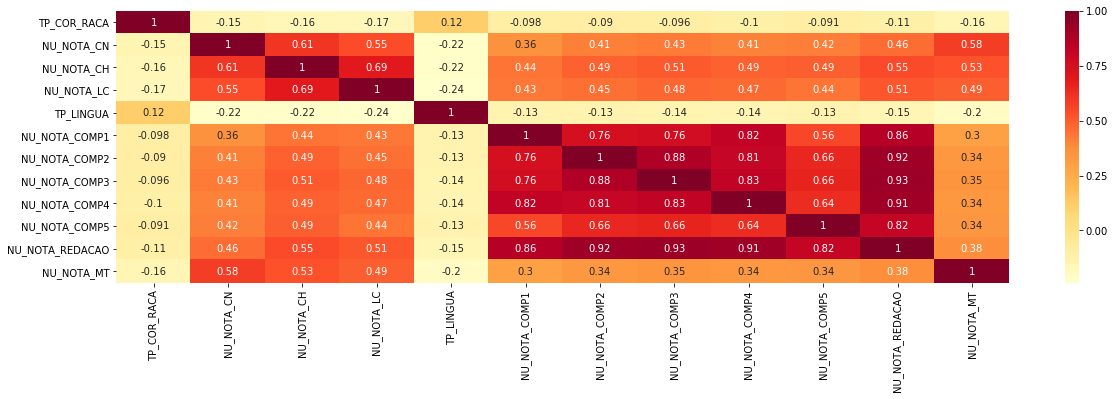

In [25]:
plt.figure(figsize=(20,5))
correlacao2=enem_treino.corr()
sns.heatmap(correlacao2, annot = True, cmap = "YlOrRd");

Vemos que temos muitos valores faltantes, mesmo eliminando várias colunas. Então teremos que fazer um tratamento nesses dados chamado de imputação.

In [28]:
enem_treino.isna().sum()

TP_COR_RACA           0
NU_NOTA_CN         3389
NU_NOTA_CH         3389
NU_NOTA_LC         3597
TP_LINGUA             0
NU_NOTA_COMP1      3597
NU_NOTA_COMP2      3597
NU_NOTA_COMP3      3597
NU_NOTA_COMP4      3597
NU_NOTA_COMP5      3597
NU_NOTA_REDACAO    3597
NU_NOTA_MT         3597
dtype: int64

In [29]:
enem_teste.isna().sum()

TP_COR_RACA           0
NU_NOTA_CN         1134
NU_NOTA_CH         1134
NU_NOTA_LC         1199
TP_LINGUA             0
NU_NOTA_COMP1      1199
NU_NOTA_COMP2      1199
NU_NOTA_COMP3      1199
NU_NOTA_COMP4      1199
NU_NOTA_COMP5      1199
NU_NOTA_REDACAO    1199
dtype: int64

Como podemos ver nas variáveis acima (tanto na base de treino como na de teste) há muitos valores faltantes. Há duas opções para resolvermos esse problema: exclusão das observações NAN's ou faremos um processo de imputação. Com a exclusão de valores faltantes não houveram bons resultados dos modelos utilizados e não consegui chegar no score mínimo de 90% para passar no desafio da Codenation. Dessa forma segui por outro caminho que foi a imputação dos valores faltantes.

No processo de imputação há algumas alternativas que são:

**1)** substituir os valores NAN's por uma constante;

**2)** Substituir os valores NAN's pela média;

**3)** Substituir os valores NAN's pela mediana;

**4)** Substituir os valores NAN's pela moda

Como os valores faltantes não são discretos, podemos usar as opções 1,2 e 3.

Para esse trabalho optei por substituir por uma constante que foi **0 (zero)**, já que estamos falando de alunos que faltaram a essas provas, sendo assim, a nota a eles atribuída é zero.

Imputando os valores faltantes por zero.

In [30]:
for i in enem_treino.columns:
    enem_treino[i].fillna(0,inplace=True)

for i in enem_teste.columns:
    enem_treino[i].fillna(0,inplace=True)

Conferindo os valores faltantes, vemos que eles foram todos substituídos.

In [31]:
enem_treino.isna().sum()

TP_COR_RACA        0
NU_NOTA_CN         0
NU_NOTA_CH         0
NU_NOTA_LC         0
TP_LINGUA          0
NU_NOTA_COMP1      0
NU_NOTA_COMP2      0
NU_NOTA_COMP3      0
NU_NOTA_COMP4      0
NU_NOTA_COMP5      0
NU_NOTA_REDACAO    0
NU_NOTA_MT         0
dtype: int64

In [32]:
enem_teste.isna().sum()

TP_COR_RACA           0
NU_NOTA_CN         1134
NU_NOTA_CH         1134
NU_NOTA_LC         1199
TP_LINGUA             0
NU_NOTA_COMP1      1199
NU_NOTA_COMP2      1199
NU_NOTA_COMP3      1199
NU_NOTA_COMP4      1199
NU_NOTA_COMP5      1199
NU_NOTA_REDACAO    1199
dtype: int64

## Separando dados de treino e de teste

Antes de treinarmos os modelos iremos aplicá-los em dados da nossa base de treino e depois vamos usar em nossa base de teste. Agora separaremos os dados de treino entre as variáveis e a classe a ser predita pelos modelos.

In [35]:
treino=enem_treino.drop('NU_NOTA_MT',axis=1)

In [36]:
alvo=enem_treino['NU_NOTA_MT']

Separando os dados, foi escolhida uma proporção treino/teste de 85/15, já que essa base tem várias observações.

In [59]:
X_treino, X_teste, y_treino, y_teste = train_test_split(treino, alvo,test_size=0.15,random_state=42)

Dimensões.

In [60]:
print(X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape)

(11670, 11) (2060, 11) (11670,) (2060,)


## Aplicando modelos de *Machine Learning*

### Modelo de regressão linear

Vamos instanciar, treinar e gerar as previsões com o modelo de regressão linear.

In [61]:
enem_model=LinearRegression().fit(X_treino,y_treino)
enem_model.predict(X_teste)
y_pred_lr=enem_model.predict(X_teste)
y_pred_lr

Transformando valores reais e preditos em formato lista.

In [66]:
x1=y_pred_lr.tolist()
x2=y_teste.tolist()

Comparando as notas preditas e notas reais.

Como temos muitas observações selecionamos as 120 primeiras e as plotamos abaixo.

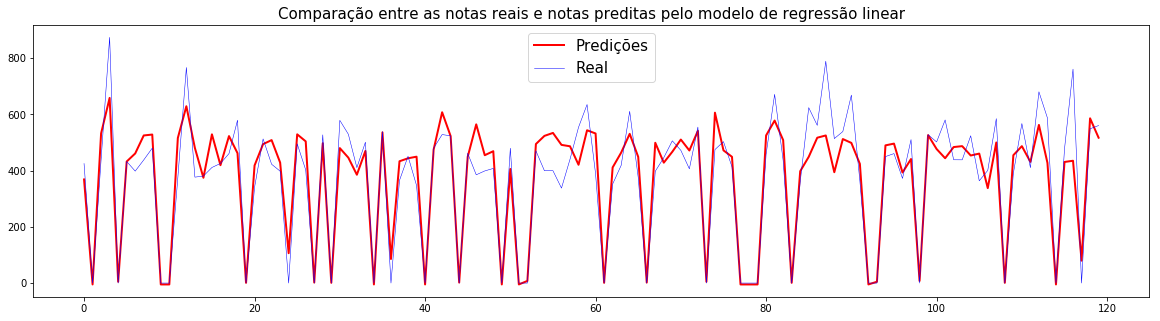

In [74]:
%matplotlib inline
plt.figure(figsize=(20,5))
plt.plot(x1[:120], linewidth=2, color='r')
plt.plot(x2[:120], linewidth=0.5,color='b')
plt.title('Comparação entre as notas reais e notas preditas pelo modelo de regressão linear',size=15)
plt.legend(['Predições','Real'],fontsize=15)
plt.show()

#### Métricas de avaliação do modelo de regressão linear

In [73]:
print('O erro médio absoluto é :',mean_absolute_error(y_teste,enem_model.predict(X_teste)))
print('O erro médio quadrado é :',mean_squared_error(y_teste,enem_model.predict(X_teste)))
print('O erro mediano absoluto é :',median_absolute_error(y_teste,enem_model.predict(X_teste)))
print('O R quadrado é :',r2_score(y_teste,enem_model.predict(X_teste)))
print('O erro médio absoluto é :',rmse(y_teste,enem_model.predict(X_teste)))

O erro médio absoluto é : 50.351399572251836
O erro médio quadrado é : 5212.427625536414
O erro mediano absoluto é : 36.22500000000002
O R quadrado é : 0.9026553355768084
O erro médio absoluto é : 72.19714416468572


### *Support Vector Regression*

Inastanciando, treinando e gerando previsões com o modelo *SVM*.

In [75]:
enem_model=svm.SVR().fit(X_treino,y_treino)
enem_model.predict(X_teste)
y_pred_lr=enem_model.predict(X_teste)
y_pred_lr

array([3.62827994e+02, 9.97928748e-02, 4.92250483e+02, ...,
       1.54610488e+02, 9.97880924e-02, 1.57145265e+02])

Criando as listas.

In [76]:
x1=y_pred_lr.tolist()
x2=y_teste.tolist()

Comparando as previsões.

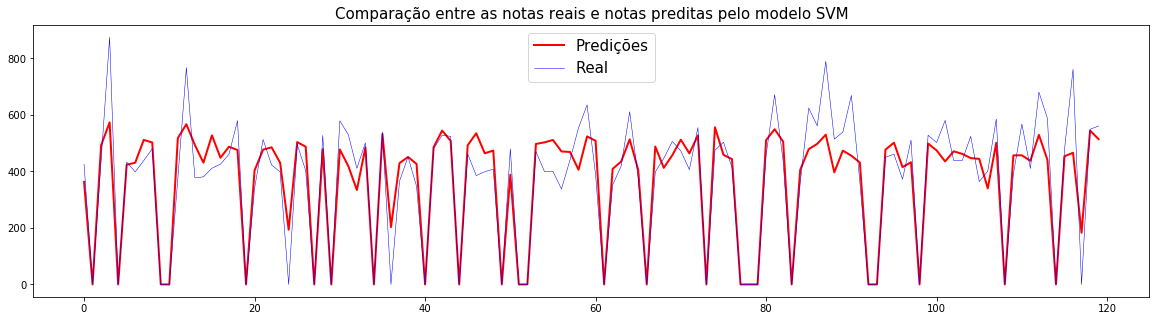

In [77]:
%matplotlib inline
plt.figure(figsize=(20,5))
plt.plot(x1[:120], linewidth=2, color='r')
plt.plot(x2[:120], linewidth=0.5,color='b')
plt.title('Comparação entre as notas reais e notas preditas pelo modelo SVM',size=15)
plt.legend(['Predições','Real'],fontsize=15)
plt.show()

#### Métricas de avaliação do modelo *SVM*

O modelo *SVM* teve um desempenho inferior ao da regressão linear.

In [78]:
print('O erro médio absoluto é :',mean_absolute_error(y_teste,enem_model.predict(X_teste)))
print('O erro médio quadrado é :',mean_squared_error(y_teste,enem_model.predict(X_teste)))
print('O erro mediano absoluto é :',median_absolute_error(y_teste,enem_model.predict(X_teste)))
print('O R quadrado é :',r2_score(y_teste,enem_model.predict(X_teste)))
print('O erro médio absoluto é :',rmse(y_teste,enem_model.predict(X_teste)))

O erro médio absoluto é : 51.6507437768543
O erro médio quadrado é : 5925.776136458707
O erro mediano absoluto é : 34.476554353028405
O R quadrado é : 0.8893331992516317
O erro médio absoluto é : 76.97906297467323


### *Decision Tree Regressor*

Modelo de Árvore de Decisão.

In [79]:
enem_model=DecisionTreeRegressor().fit(X_treino,y_treino)
enem_model.predict(X_teste)
y_pred_lr=enem_model.predict(X_teste)
y_pred_lr

array([379.2,   0. , 433.7, ...,   0. ,   0. ,   0. ])

Criando as listas de previsões e dados reais.

In [80]:
x1=y_pred_lr.tolist()
x2=y_teste.tolist()

Comparando os resultados.

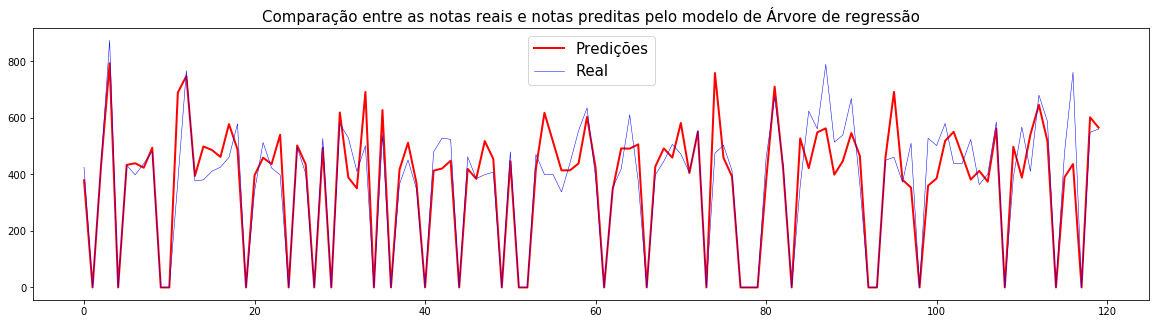

In [81]:
%matplotlib inline
plt.figure(figsize=(20,5))
plt.plot(x1[:120], linewidth=2, color='r')
plt.plot(x2[:120], linewidth=0.5,color='b')
plt.title('Comparação entre as notas reais e notas preditas pelo modelo de Árvore de regressão',size=15)
plt.legend(['Predições','Real'],fontsize=15)
plt.show()

#### Métricas de avaliação da Árvore de regressão.

Também ficou abaixo da regressão linear.

In [82]:
print('O erro médio absoluto é :',mean_absolute_error(y_teste,enem_model.predict(X_teste)))
print('O erro médio quadrado é :',mean_squared_error(y_teste,enem_model.predict(X_teste)))
print('O erro mediano absoluto é :',median_absolute_error(y_teste,enem_model.predict(X_teste)))
print('O R quadrado é :',r2_score(y_teste,enem_model.predict(X_teste)))
print('O erro médio absoluto é :',rmse(y_teste,enem_model.predict(X_teste)))

O erro médio absoluto é : 60.485
O erro médio quadrado é : 8427.46809223301
O erro mediano absoluto é : 38.849999999999994
O R quadrado é : 0.842612864424923
O erro médio absoluto é : 91.80124232401765


### Regressão *Ridge*

Instanciando, treinando e gerando as previsões com a Regressão *Ridge*.

In [91]:
enem_model=Ridge(alpha=1,solver='cholesky').fit(X_treino,y_treino)
enem_model.predict(X_teste)
y_pred_lr=enem_model.predict(X_teste)
y_pred_lr

array([368.51113563,  -7.17041401, 533.92608209, ...,  89.71895744,
        -0.97338008,  73.94032673])

Listas.

In [92]:
x1=y_pred_lr.tolist()
x2=y_teste.tolist()

Comparando os resultados.

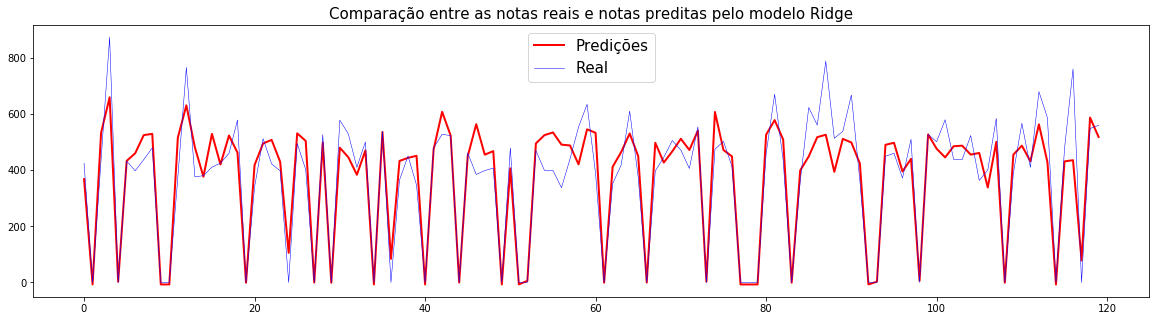

In [99]:
%matplotlib inline
plt.figure(figsize=(20,5))
plt.plot(x1[:120], linewidth=2, color='r')
plt.plot(x2[:120], linewidth=0.5,color='b')
plt.title('Comparação entre as notas reais e notas preditas pelo modelo Ridge',size=15)
plt.legend(['Predições','Real'],fontsize=15)
plt.show()

#### Métricas de avaliação do modelo Ridge

In [94]:
print('O erro médio absoluto é :',mean_absolute_error(y_teste,enem_model.predict(X_teste)))
print('O erro médio quadrado é :',mean_squared_error(y_teste,enem_model.predict(X_teste)))
print('O erro mediano absoluto é :',median_absolute_error(y_teste,enem_model.predict(X_teste)))
print('O R quadrado é :',r2_score(y_teste,enem_model.predict(X_teste)))
print('O erro médio absoluto é :',rmse(y_teste,enem_model.predict(X_teste)))

O erro médio absoluto é : 50.43569158187698
O erro médio quadrado é : 5208.852835235016
O erro mediano absoluto é : 36.5307931609201
O R quadrado é : 0.9027220965540868
O erro médio absoluto é : 72.17238277371072


### Regressão Lasso

In [111]:
enem_model=Lasso(alpha=0.01).fit(X_treino,y_treino)
enem_model.predict(X_teste)
y_pred_lr=enem_model.predict(X_teste)
y_pred_lr

array([368.53628786,  -7.15227797, 533.93439489, ...,  89.70008571,
        -0.97036859,  73.94436145])

Listas.

In [112]:
x1=y_pred_lr.tolist()
x2=y_teste.tolist()

Comparação gráfica dos resultados.

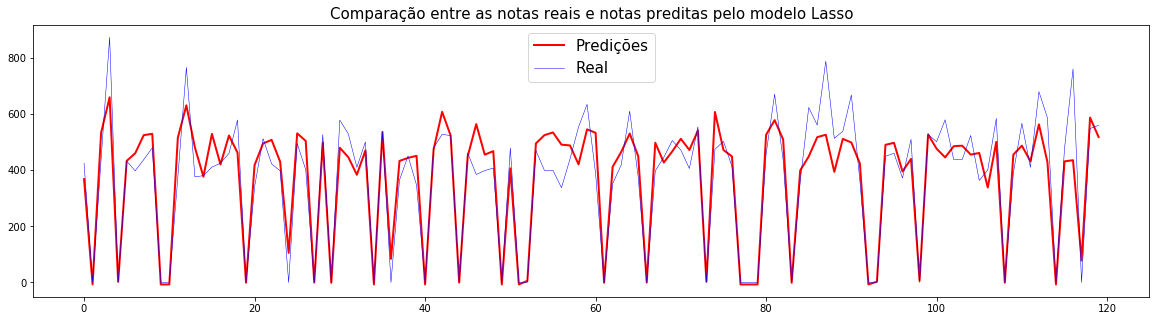

In [113]:
%matplotlib inline
plt.figure(figsize=(20,5))
plt.plot(x1[:120], linewidth=2, color='r')
plt.plot(x2[:120], linewidth=0.5,color='b')
plt.title('Comparação entre as notas reais e notas preditas pelo modelo Lasso',size=15)
plt.legend(['Predições','Real'],fontsize=15)
plt.show()

#### Métricas de avaliação do modelo Lasso

In [114]:
print('O erro médio absoluto é :',mean_absolute_error(y_teste,enem_model.predict(X_teste)))
print('O erro médio quadrado é :',mean_squared_error(y_teste,enem_model.predict(X_teste)))
print('O erro mediano absoluto é :',median_absolute_error(y_teste,enem_model.predict(X_teste)))
print('O R quadrado é :',r2_score(y_teste,enem_model.predict(X_teste)))
print('O erro médio absoluto é :',rmse(y_teste,enem_model.predict(X_teste)))

O erro médio absoluto é : 50.43258653128715
O erro médio quadrado é : 5208.733288687836
O erro mediano absoluto é : 36.52336842414303
O R quadrado é : 0.9027243291449933
O erro médio absoluto é : 72.17155456748758


### *Bagging Regressor*

In [115]:
enem_model=BaggingRegressor(max_samples=70).fit(X_treino,y_treino)
enem_model.predict(X_teste)
y_pred_lr=enem_model.predict(X_teste)
y_pred_lr

array([420.31,   0.  , 496.79, ...,  49.52,   0.  ,  35.1 ])

Lista de notas preditas e reais.

In [116]:
x1=y_pred_lr.tolist()
x2=y_teste.tolist()

Comparação.

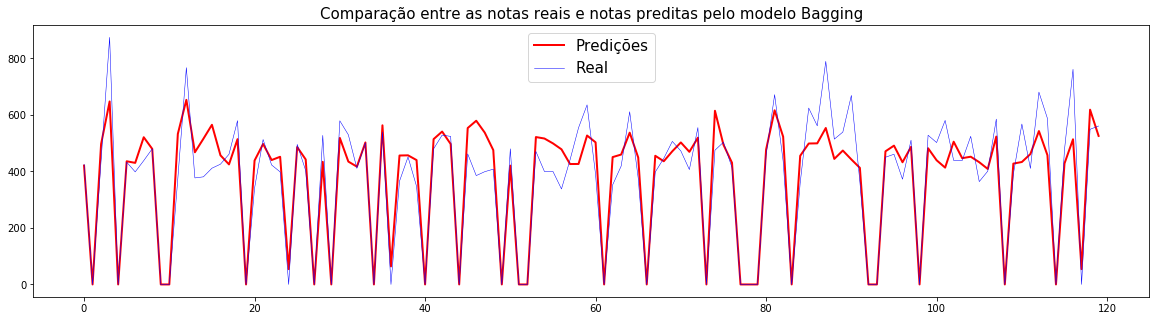

In [117]:
%matplotlib inline
plt.figure(figsize=(20,5))
plt.plot(x1[:120], linewidth=2, color='r')
plt.plot(x2[:120], linewidth=0.5,color='b')
plt.title('Comparação entre as notas reais e notas preditas pelo modelo Bagging',size=15)
plt.legend(['Predições','Real'],fontsize=15)
plt.show()

#### Métricas do modelo *Bagging*

Vamos que esse modelo teve um resultado melhor que a regressão linear.

In [118]:
print('O erro médio absoluto é :',mean_absolute_error(y_teste,enem_model.predict(X_teste)))
print('O erro médio quadrado é :',mean_squared_error(y_teste,enem_model.predict(X_teste)))
print('O erro mediano absoluto é :',median_absolute_error(y_teste,enem_model.predict(X_teste)))
print('O R quadrado é :',r2_score(y_teste,enem_model.predict(X_teste)))
print('O erro médio absoluto é :',rmse(y_teste,enem_model.predict(X_teste)))

O erro médio absoluto é : 47.43124757281553
O erro médio quadrado é : 4725.1433603398045
O erro mediano absoluto é : 35.670000000000016
O R quadrado é : 0.9117556102821832
O erro médio absoluto é : 68.73967820945778


### *AdaBoost Regressor*

In [119]:
enem_model=AdaBoostRegressor().fit(X_treino,y_treino)
enem_model.predict(X_teste)
y_pred_lr=enem_model.predict(X_teste)
y_pred_lr

array([284.44082305,   0.        , 511.42426914, ...,   0.        ,
         0.        ,   0.        ])

Listas.

In [120]:
x1=y_pred_lr.tolist()
x2=y_teste.tolist()

Comparando os resultados.

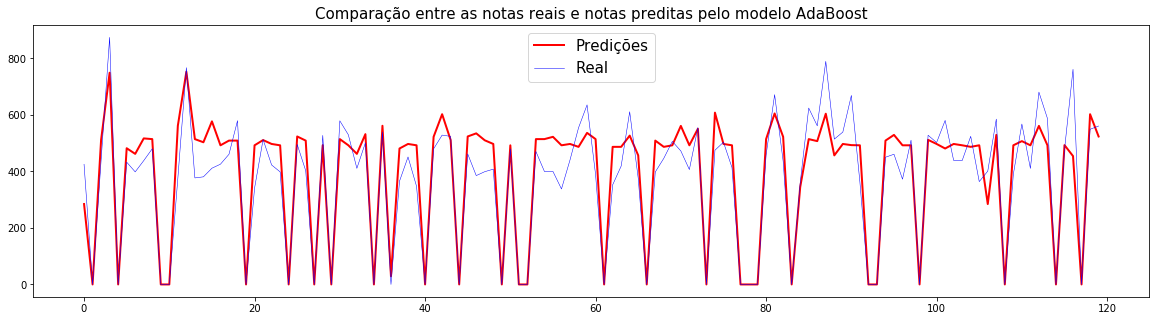

In [124]:
%matplotlib inline
plt.figure(figsize=(20,5))
plt.plot(x1[:120], linewidth=2, color='r')
plt.plot(x2[:120], linewidth=0.5,color='b')
plt.title('Comparação entre as notas reais e notas preditas pelo modelo AdaBoost',size=15)
plt.legend(['Predições','Real'],fontsize=15)
plt.show()

#### Métricas do modelo *AdaBoost*

In [122]:
print('O erro médio absoluto é :',mean_absolute_error(y_teste,enem_model.predict(X_teste)))
print('O erro médio quadrado é :',mean_squared_error(y_teste,enem_model.predict(X_teste)))
print('O erro mediano absoluto é :',median_absolute_error(y_teste,enem_model.predict(X_teste)))
print('O R quadrado é :',r2_score(y_teste,enem_model.predict(X_teste)))
print('O erro médio absoluto é :',rmse(y_teste,enem_model.predict(X_teste)))

O erro médio absoluto é : 51.60697454856146
O erro médio quadrado é : 5269.6762898683855
O erro mediano absoluto é : 41.98983518174023
O R quadrado é : 0.9015861884502816
O erro médio absoluto é : 72.59253604791877


### *Gradient Boosting Regressor*

In [125]:
enem_model=GradientBoostingRegressor().fit(X_treino,y_treino)
enem_model.predict(X_teste)
y_pred_lr=enem_model.predict(X_teste)
y_pred_lr

array([4.05944157e+02, 4.46127166e-01, 4.88332025e+02, ...,
       6.43684431e+00, 5.00718344e-02, 1.93259046e+00])

In [126]:
x1=y_pred_lr.tolist()
x2=y_teste.tolist()

Comparando os resultados com os valores reais.

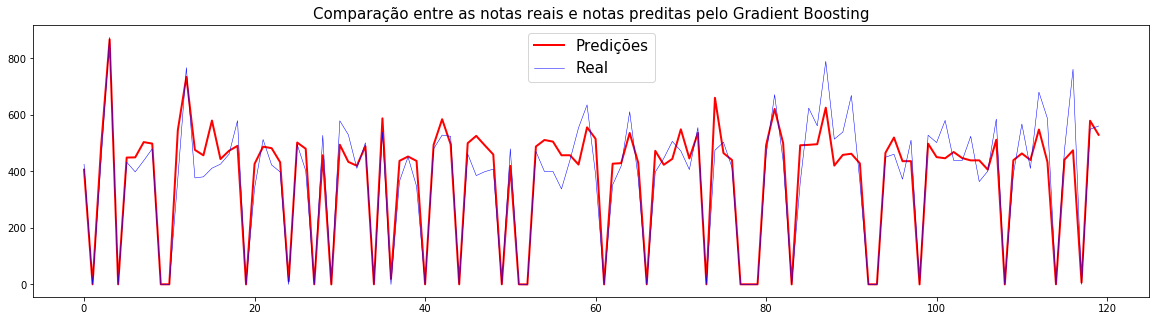

In [129]:
%matplotlib inline
plt.figure(figsize=(20,5))
plt.plot(x1[:120], linewidth=2, color='r')
plt.plot(x2[:120], linewidth=0.5,color='b')
plt.title('Comparação entre as notas reais e notas preditas pelo Gradient Boosting',size=15)
plt.legend(['Predições','Real'],fontsize=15)
plt.show()

#### Métricas de avaliação do modelo *Gradient Boosting*

Até o momento esse modelo foi que teve as menores métricas de erro e o maior $R^2$.

In [128]:
print('O erro médio absoluto é :',mean_absolute_error(y_teste,enem_model.predict(X_teste)))
print('O erro médio quadrado é :',mean_squared_error(y_teste,enem_model.predict(X_teste)))
print('O erro mediano absoluto é :',median_absolute_error(y_teste,enem_model.predict(X_teste)))
print('O R quadrado é :',r2_score(y_teste,enem_model.predict(X_teste)))
print('O erro médio absoluto é :',rmse(y_teste,enem_model.predict(X_teste)))

O erro médio absoluto é : 43.54896701355433
O erro médio quadrado é : 4083.538131201507
O erro mediano absoluto é : 30.74598274049677
O R quadrado é : 0.9237379053296286
O erro médio absoluto é : 63.90256748520756


### *ElasticNet*

In [130]:
enem_model=ElasticNet(alpha=0.01,l1_ratio=0.5).fit(X_treino,y_treino)
enem_model.predict(X_teste)
x1=enem_model.predict(X_teste).tolist()
x2=y_teste.tolist()

Comparação gráfica.

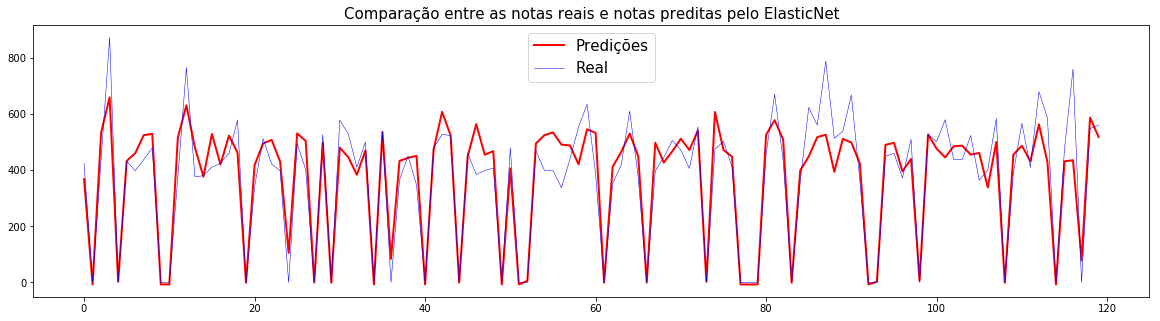

In [135]:
%matplotlib inline
plt.figure(figsize=(20,5))
plt.plot(x1[:120], linewidth=2, color='r')
plt.plot(x2[:120], linewidth=0.5,color='b')
plt.title('Comparação entre as notas reais e notas preditas pelo ElasticNet',size=15)
plt.legend(['Predições','Real'],fontsize=15)
plt.show()

#### Métricas de avaliação do modelo *ElasticNet*

In [132]:
print('O erro médio absoluto é :',mean_absolute_error(y_teste,enem_model.predict(X_teste)))
print('O erro médio quadrado é :',mean_squared_error(y_teste,enem_model.predict(X_teste)))
print('O erro mediano absoluto é :',median_absolute_error(y_teste,enem_model.predict(X_teste)))
print('O R quadrado é :',r2_score(y_teste,enem_model.predict(X_teste)))
print('O erro médio absoluto é :',rmse(y_teste,enem_model.predict(X_teste)))

O erro médio absoluto é : 50.42526679874548
O erro médio quadrado é : 5208.4417577402355
O erro mediano absoluto é : 36.51310309573395
O R quadrado é : 0.9027297736296561
O erro médio absoluto é : 72.16953483111995


### *Extreme Gradient Boosting (XGB) Regressor*

Inastanciando, treinando e gerando as previsões.

In [150]:
enem_model=xgb.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=10, subsample=0.9,
                           colsample_bytree=1, max_depth=10).fit(X_treino,y_treino)
enem_model.predict(X_teste)
x1=enem_model.predict(X_teste).tolist()
x2=y_teste.tolist()

Comparando o real e o predito graficamente.

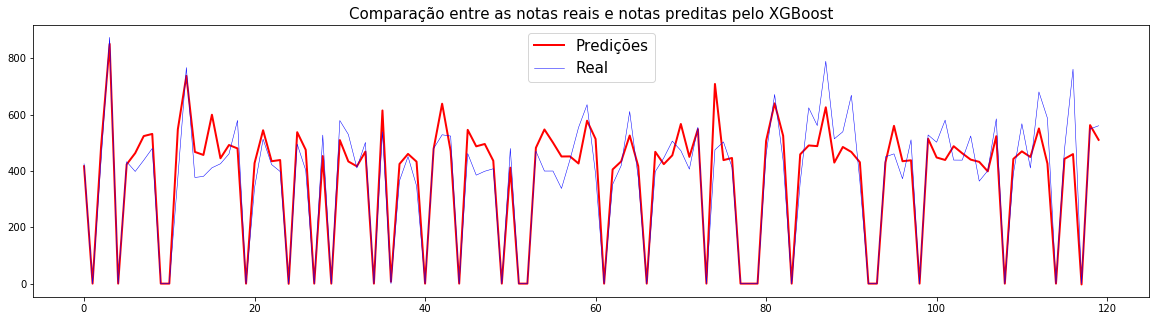

In [153]:
%matplotlib inline
plt.figure(figsize=(20,5))
plt.plot(x1[:120], linewidth=2, color='r')
plt.plot(x2[:120], linewidth=0.5,color='b')
plt.title('Comparação entre as notas reais e notas preditas pelo XGBoost',size=15)
plt.legend(['Predições','Real'],fontsize=15)
plt.show()

#### Métricas de avaliação do modelo *XGBoost*

In [152]:
print('O erro médio absoluto é :',mean_absolute_error(y_teste,enem_model.predict(X_teste)))
print('O erro médio quadrado é :',mean_squared_error(y_teste,enem_model.predict(X_teste)))
print('O erro mediano absoluto é :',median_absolute_error(y_teste,enem_model.predict(X_teste)))
print('O R quadrado é :',r2_score(y_teste,enem_model.predict(X_teste)))
print('O erro médio absoluto é :',rmse(y_teste,enem_model.predict(X_teste)))

O erro médio absoluto é : 45.2347410744747
O erro médio quadrado é : 4471.066534671295
O erro mediano absoluto é : 32.669342041015625
O R quadrado é : 0.9165006206898558
O erro médio absoluto é : 66.86603423765533


Todos os modelos tiveram um bom desempenho, então vamos aplicá-los ao nosso desafio da *Codenation* e para cada modelo, o seu desempenho no desafio, será mostrado em seguida.

Agora usaremos a base *test.csv* para gerar as previsões em um arquivo *csv*.

Abaixo podemos ver, novamente, as dimensões das nossas bases de dados.

In [156]:
print(treino.shape,alvo.shape,enem_teste.shape)

(13730, 11) (13730,) (4576, 11)


### Normalizando os dados

Nessa etapa colocaremos as variáveis na mesma escala. O StandarScaler coloca os dados em uma distribuição Normal-padrão, ou seja, a média 0 e variância 1.

Instanciando o *StandardScaler*.

In [154]:
sc = StandardScaler()

Aplicando o *StandardScaler* nas bases de treino e teste. Optei por não aplicar o *StandardScaler* nos dados de **NU_NOTA_MT**.

In [155]:
treino=sc.fit_transform(treino)
enem_teste=sc.fit_transform(enem_teste)

Enfim, feito todo o pré-processamento de dados irei aplicar os modelos de *Machine Learning* de regressão.

Usarei os mesmo modelos que usamos anteriormente.

## Aplicação dos modelos de *Machine Learning* no Desafio *Codenation* 2020

### Regressão Linear

In [28]:
#Importando o modelo regressão linear
#instanciando o modelo
enem_model=LinearRegression()

In [29]:
#treinando o modelo com os dados de treino
enem_model.fit(treino,alvo)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
#gerando as previões com o modelo
enem_model.predict(enem_teste)

array([ 5.10170070e+08, -5.45761516e+10,  1.79802506e+10, ...,
       -7.74463085e+10, -4.14335201e+10,  1.13572565e+11])

In [31]:
#Atribuindo a uma variável os valores preditos
y_pred_lr=enem_model.predict(enem_teste)

In [32]:
#Valores preditos
y_pred_lr

array([ 5.10170070e+08, -5.45761516e+10,  1.79802506e+10, ...,
       -7.74463085e+10, -4.14335201e+10,  1.13572565e+11])

In [33]:
#atribuindo uma lista com variáveis a serem criadas no pdf
features4=['NU_INSCRICAO','NU_NOTA_MT']

In [34]:
#Gerando o arquivo csv com a coluna 'NU_INSCRICAO' e com uma coluna 'NU_NOTA_MT'
enem_teste2=pd.read_csv("test.csv")
enem_teste2['NU_NOTA_MT']=y_pred_lr
enem_teste2=enem_teste2[features4]
enem_teste2.to_csv('answer.csv',index=False)

Para o modelo de regressão linear obtive o score de **92.72%** no desafio da *Codenation*. Com esse resultado já foi suficiente para superar o *score* mínimo de 90% para ingressar no *Bootcamp* de *Data Science*.

## *Support Vector Regression*

In [36]:
#Instanciando e treinando o modelo
clf=svm.SVR().fit(treino,alvo)

In [37]:
#Gerando as previsões e atribuindo a uma variável
y_pred_clf = clf.predict(enem_teste)

In [38]:
#Valores preditos
y_pred_clf

array([427.33169087, 445.45026649, 470.82015965, ..., 566.19248287,
       446.72085644,  -1.34037223])

In [39]:
#Gerando o arquivo csv com a coluna 'NU_INSCRICAO' e com uma coluna 'NU_NOTA_MT'
enem_teste1=pd.read_csv("test.csv")
enem_teste1['NU_NOTA_MT']=y_pred_clf
enem_teste1=enem_teste1[features4]
enem_teste1.to_csv('answer.csv',index=False)

Para o modelo de Support Vector Regression obtive o score de **92.36%** no desafio da *Codenation*. Com esse resultado já foi suficiente para superar o *score* mínimo de 90% para ingressar no *Bootcamp* de *Data Science*.

## Regressão Árvore de Decisão

In [41]:
#Instanciando o modelo
enem_dtr=DecisionTreeRegressor(criterion='mae',max_depth=8,max_leaf_nodes=None, min_impurity_split=None,min_samples_leaf=1,
                               min_samples_split=2, min_weight_fraction_leaf=0.0, random_state=0)

In [42]:
#Treinando o modelo
enem_dtr.fit(treino,alvo)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mae', max_depth=8,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [43]:
#Gerando as previsões e atribuindo a uma variável
y_dtr_pred=enem_dtr.predict(enem_teste)
y_dtr_pred

array([416.45, 429.2 , 590.8 , ..., 725.2 , 444.75,   0.  ])

In [44]:
#Gerando o arquivo csv com a coluna 'NU_INSCRICAO' e com uma coluna 'NU_NOTA_MT'
enem_teste3=pd.read_csv("test.csv")
enem_teste3['NU_NOTA_MT']=y_dtr_pred
enem_teste3=enem_teste3[features4]
enem_teste3.to_csv('answer.csv',index=False)

Para o modelo de regressão de árvore de decisão obtive o *score* de **91.23%** no desafio da *Codenation*. Com esse resultado já foi suficiente para superar o *score* mínimo de 90% para ingressar no *Bootcamp* de *Data Science*.

## Regressão *Ridge*

In [46]:
#Instanciando e treinando o modelo
enem_ridge=Ridge(alpha=0.05,solver='cholesky')
enem_ridge.fit(treino,alvo)

Ridge(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='cholesky', tol=0.001)

In [47]:
#Gerando as previsões
y_rid_pred=enem_ridge.predict(enem_teste)

In [48]:
#Valores preditos
y_rid_pred

array([427.23111008, 479.3393302 , 571.11688897, ..., 601.55969094,
       489.49629913,  -1.15172572])

In [49]:
#Gerando o arquivo csv com a coluna 'NU_INSCRICAO' e com uma coluna 'NU_NOTA_MT'
enem_teste4=pd.read_csv("test.csv")
enem_teste4['NU_NOTA_MT']=y_rid_pred
enem_teste4=enem_teste4[features4]
enem_teste4.to_csv('answer.csv',index=False)

Para o modelo de regressão ridge obtive o score de **92.72%** no desafio da *Codenation*. Com esse resultado já foi suficiente para superar o *score* mínimo de 90% para ingressar no *Bootcamp* de *Data Science*.

## Regressão Lasso

In [50]:
#Importando, instanciando e treinando o modelo
enem_lasso=Lasso(alpha=0.01)
enem_lasso.fit(treino,alvo)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [51]:
#Gerando as previsões
y_pred_lasso=enem_lasso.predict(enem_teste)
y_pred_lasso

array([427.13702724, 479.37363616, 571.07423343, ..., 601.45677408,
       489.45812349,  -1.15479482])

In [52]:
#Gerando o arquivo csv com a coluna 'NU_INSCRICAO' e com uma coluna 'NU_NOTA_MT'
enem_teste5=pd.read_csv("test.csv")
enem_teste5['NU_NOTA_MT']=y_pred_lasso
enem_teste5=enem_teste5[features4]
enem_teste5.to_csv('answer.csv',index=False)

Para o modelo de regressão lasso obtive o *score* de **92.72%** no desafio da *Codenation*. Com esse resultado já foi suficiente para superar o *score* mínimo de 90% para ingressar no *Bootcamp* de *Data Science*.

## Regressão *Bagging*

In [53]:
#Treinando e instanciando o modelo
enem_bag=BaggingRegressor(max_samples=70)

In [54]:
#Treinando o modelo
enem_bag.fit(treino,alvo)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=70, n_estimators=10, n_jobs=None,
                 oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [55]:
#Gerando as previsões
y_pred_bag=enem_bag.predict(enem_teste)
y_pred_bag

array([409.9 , 451.42, 574.62, ..., 675.79, 470.5 ,   0.  ])

In [56]:
#Gerando o arquivo csv com a coluna 'NU_INSCRICAO' e com uma coluna 'NU_NOTA_MT'
enem_teste6=pd.read_csv("test.csv")
enem_teste6['NU_NOTA_MT']=y_pred_bag
enem_teste6=enem_teste6[features4]
enem_teste6.to_csv('answer.csv',index=False)

Para o modelo de regressão Bagging obtive o score de **93.17%** no desafio da *Codenation*. Com esse resultado já foi suficiente para superar o *score* mínimo de 90% para ingressar no *Bootcamp* de *Data Science*.

## Regressão *AdaBoost*

In [57]:
#Importando, instanciando e treinando o modelo
enem_ada=AdaBoostRegressor()
enem_ada.fit(treino,alvo)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [58]:
#Gerando as previsões
y_pred_ada=enem_ada.predict(enem_teste)
y_pred_ada

array([480.72307692, 465.42990937, 585.94277209, ..., 632.40129234,
       480.2752387 ,  36.3010101 ])

In [59]:
#Gerando o arquivo csv com a coluna 'NU_INSCRICAO' e com uma coluna 'NU_NOTA_MT'
enem_teste7=pd.read_csv("test.csv")
enem_teste7['NU_NOTA_MT']=y_pred_ada
enem_teste7=enem_teste7[features4]
enem_teste7.to_csv('answer.csv',index=False)

Para o modelo de regressão Adaboost obtive o *score* de **89.89%** no desafio da *Codenation*. Com esse resultado não seria possóvel superar o *score* mínimo de 90% para ingressar no *Bootcamp* de *Data Science*.

## Regressão *Gradient Boosting*

In [60]:
#Importando, instanciando e treinando o modelo
enem_gbr=GradientBoostingRegressor()
enem_gbr.fit(treino,alvo)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [61]:
#Gerando as previsões
y_pred_gbr=enem_gbr.predict(enem_teste)
y_pred_gbr

array([4.35584337e+02, 4.47240068e+02, 5.93311595e+02, ...,
       6.79622049e+02, 4.45750053e+02, 4.58602669e-01])

In [62]:
#Gerando o arquivo csv com a coluna 'NU_INSCRICAO' e com uma coluna 'NU_NOTA_MT'
enem_teste8=pd.read_csv("test.csv")
enem_teste8['NU_NOTA_MT']=y_pred_gbr
enem_teste8=enem_teste8[features4]
enem_teste8.to_csv('answer.csv',index=False)

Para o modelo de regressão *Gradiente boosting* obtive o *score* de **93.63%** no desafio da *Codenation*. Com esse resultado já foi suficiente para superar o *score* mínimo de 90% para ingressar no *Bootcamp* de *Data Science*.

## Regressão *ElasticNet*

In [63]:
#Importando, instanciando e treinando o modelo
enem_en=ElasticNet(alpha=0.01,l1_ratio=0.5)
enem_en.fit(treino,alvo)

ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [64]:
#Gerando as previsões
enem_pred_en=enem_en.predict(enem_teste)
enem_pred_en

array([425.99751976, 478.33716784, 564.61607548, ..., 600.8045946 ,
       487.08043907,  -0.81814107])

In [65]:
#Gerando o arquivo csv com a coluna 'NU_INSCRICAO' e com uma coluna 'NU_NOTA_MT'
enem_teste9=pd.read_csv("test.csv")
enem_teste9['NU_NOTA_MT']=enem_pred_en
enem_teste9=enem_teste9[features4]
enem_teste9.to_csv('answer.csv',index=False)

Para o modelo de regressão ElasticNet* obtive o *score* de **92.72%** no desafio da *Codenation*. Com esse resultado já foi suficiente para superar o *score* mínimo de 90% para ingressar no *Bootcamp* de *Data Science*.

## Regressão *Stochastic Gradient*

In [66]:
#Importando, instanciando e treinando o modelo
enem_sgd=SGDRegressor(penalty='l2',alpha=0.05)
enem_sgd.fit(treino,alvo)

SGDRegressor(alpha=0.05, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [67]:
#Gerando as previsões
y_pred_sgd=enem_sgd.predict(enem_teste)
y_pred_sgd

array([4.22131349e+02, 4.70064124e+02, 5.30735867e+02, ...,
       6.00418302e+02, 4.73692291e+02, 3.30911851e-01])

In [68]:
#Gerando o arquivo csv com a coluna 'NU_INSCRICAO' e com uma coluna 'NU_NOTA_MT'
enem_teste10=pd.read_csv("test.csv")
enem_teste10['NU_NOTA_MT']=y_pred_sgd
enem_teste10=enem_teste10[features4]
enem_teste10.to_csv('answer.csv',index=False)

Para o modelo de regressão *Stochastic Gradient* obtive o *score* de **92.61%** no desafio da *Codenation*. Com esse resultado já foi suficiente para superar o *score* mínimo de 90% para ingressar no *Bootcamp* de *Data Science*.

## Regressão *XGBoost*

In [70]:
#Instanciando o modelo
enem_xgb = xgb.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=10, subsample=0.9,colsample_bytree=1, max_depth=10)

In [71]:
#Treinando o modelo
enem_xgb.fit(treino,alvo)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=10, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.08, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.9, tree_method=None,
             validate_parameters=False, verbosity=None)

In [72]:
#Gerando as previões
y_pred_xgb=enem_xgb.predict(enem_teste)

In [73]:
#Gerando o arquivo csv com a coluna 'NU_INSCRICAO' e com uma coluna 'NU_NOTA_MT'
enem_teste11=pd.read_csv("test.csv")
enem_teste11['NU_NOTA_MT']=y_pred_xgb
enem_teste11=enem_teste11[features4]
enem_teste11.to_csv('answer.csv',index=False)

Para o modelo de regressão *XGBoost* obtive o *score* de **93.58%** no desafio da *Codenation*. Com esse resultado já foi suficiente para superar o *score* mínimo de 90% para ingressar no *Bootcamp* de *Data Science*.

## Comparando os resultados entre os modelos

Abaixo podemos ver uma tabela comparando os *score* que cada modelo obteve no desfio da *Codenation*. O modelo com melhor desempenho foi a Regressão *Gradient Boosting* com um *Score* de 93.63%, conseguindo assim alcançar o score mínimo de 90% e participar da Aceleração.

|                                 ||   SCORE     ||
|:-------------------------------:||:-----------:||
|**Regressão Gradient Boosting**  ||   **93.63%**||
|Regressão *XGBoost*                ||   93.58%    ||
|Regressão *Bagging*                ||   93.17%    ||
|Regressão Linear                 ||   92.72%    ||
|Regressão *ElasticNet*             ||   92.72%    ||
|Regressão *Ridge*                  ||   92.72%    ||
|Regressão *Lasso*                 ||   92.72%    ||
|Regressão *Stochastic Gradient*    ||   92.61%    ||   
|*Support Vector Regression*        ||   92.36%    ||
|Regressão *Decision Tree*        ||   91.23%    ||
|Regressão *AdaBoost*             ||   89.89%    ||

Obs: alguns modelos estão com o *score* igual, mas na verdade há diferença de algumas casas decimais.